<a href="https://colab.research.google.com/github/Loelama36/Project_1_Computing_Errors/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3


Jacob Mantooth<br>
Sunil Lama<br>
Riwaz Gyawali<br>
Puran Subedi<br>

1) Newton-Raphson Method<br>
Newton's method is used to find the quick approximation of the root of a function<br>
It is calculated using the iterative with where the first is given. The formula is :- $$
x_{i+1}= x_i-\frac{f(x_i)}{f'(x_i)}
$$

In [11]:

import math

pi = math.pi



def newtonFind(fx, dfx, currentNum):
  return currentNum - fx(currentNum)/(-dfx(currentNum))

def newtonRapshon(fx, dfx, start, tolerrance, maxFind):
  num = start
  for counter in range(maxFind):
    if dfx(num) == 0:
    #  print('Zero derivative, no solution')
      return None
    if abs(fx(num))< tolerrance:
      return [num,counter]
    num = newtonFind(fx, dfx, num)
 # print('Max iterations exceeded')
  return None

In [12]:
newtonRapshon(math.cos,math.sin,pi/2,.00001,20)

[1.5707963267948966, 0]

In [13]:
seedNum = [pi/4,pi/2,pi/4+.1,1,3,10,15,3*pi/2+.01,pi+.01]
branch = []
finder = []
for seed in seedNum:
  if newtonRapshon(math.cos,math.sin,seed,1e-10,30) != None:
    branch.append(newtonRapshon(math.cos,math.sin,seed,1e-10,20)[0])
    finder.append(newtonRapshon(math.cos,math.sin,seed,1e-10,20)[1])
  else:
    branch.append('None Found')
    finder.append('>20')

In [4]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure(data=[go.Table(
                header=dict(values=['Seeds', 'Roots', 'Iterations'],line_color='lime',

                fill_color='plum',

                align='center'),
                 cells=dict(values = [seedNum,branch,finder],
                  line_color='lime',

                 fill_color='white',

                 align='center'))
                     ])
fig.show()

# Bisection Method

Bisection Method is the process of finding the root of the continuous function where we know the two values with opposite sign.
In comparison between bisection method and the Newton's method, Newton's method gives us the quadratic rate of convergence. Meanwhile, Bisection method gives the linear rate of convergence.

In [5]:
def newNumBisection(xBig, xSmall):
  num = (xBig+xSmall)/2
  return num

def positive(fx,xBig,xSmall):
  numNew = newNumBisection(xBig,xSmall)
  if fx(xBig)*fx(numNew)< 0:
    return [xBig, numNew]
  if fx(xBig)*fx(numNew)>0:
    return [numNew,xSmall]
  if fx(xBig)*fx(numNew)==0:
    return [numNew,numNew]

def fxBisection(fx, startLarge, startSmall, maxFind):
  num = [startLarge,startSmall]
  for i in range(maxFind):
    if num[0] == num[1]:
      return num[0]
    else:
      num = positive(fx,num[0],num[1])
  return num

In [6]:
fxBisection(math.cos, 3*pi/4,pi/4+.1,300)

[1.5707963267948968, 1.5707963267948966]

In [7]:
fxBisection(math.cos, pi/4,pi/8,20)

[0.3926994562057524, 0.39269908169872414]

In [8]:
x = fxBisection(math.cos, pi/4,pi/8,20)
print(math.cos(pi/8))
math.cos(x[0])

0.9238795325112867


0.9238793891935869

In [9]:
def lagrangeCoefficient(inputList,outputList,numIn,val):
  lagCoeff = 1
  for i in range(len(inputList)):
    if i == numIn:
      continue
    else:
      lagCoeff = lagCoeff*(val - inputList[i])/(inputList[numIn]-inputList[i])
  return lagCoeff

def lagrangeInterpolator(inputList, outputList, val):
  lagInter = 0
  for i in range(len(inputList)):
    lagInter = lagInter + lagrangeCoefficient(inputList,outputList,i,val)*outputList[i]
  return lagInter

inputValues = [pi/4,pi/4+.1,pi/4+.2,pi/2]
outputValues = [math.cos(x) for x in inputValues]


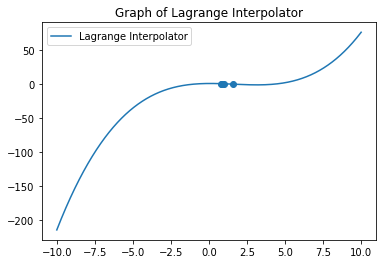

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange( -10,10,.001)
plt.scatter(inputValues,outputValues)
plt.plot(x,lagrangeInterpolator(inputValues,outputValues,x))
plt.title('Graph of Lagrange Interpolator')
plt.legend(['Lagrange Interpolator'])

plt.show()


Answer a)<br>- As we know that Newton's Method is used to find the root of the function. So, first we defined the function and then its derivative. In order to get the iterations we used the for loop. The for loop here gives us the roots of the functions with the iterations we have declared. Then, we have applied the same algorithm to our function using different initial seeds with an error tolerance of 0.01%. Also, we created the table which had the seeds, the roots that we got from the function and the number of iterations.

Answer c) <br> - The main difference between the Newton's Method and other two i.e Secant Method and Bisection Method is in terms of how it converges. First of all, like we discussed earlier, Newton's Method converges quadrilaterally but Bisection method converges linearly. Meanwhile, Secant Method converges superlinearly. Also, secant method requires one new function during each iteration while Newton's method requires two function i.e the first function and its derivative.